#### Problem Definition
The problem involves **binary classification** (a sample can only be one of two things). Which involves using a number of different **features** (pieces of information) about a person to predict whether they have heart disease or not.

#### Data
The original data came from the Cleveland database from UCI Machine Learning Repository. The original database contains 76 attributes, but here only 14 attributes were used.

#### Features
Heart Diseases Data Dictionary
The following are the fearure used to predict the target variable (heart diseases or no heart diseases)
1. age: age in years
2. gender: gender (1 = male; 0 = female)
3. cp: chest pain type            
    - 0: Typical angina: chest pain related decrease blood supply to the heart          
    - 1: Atypical angina: chest pain not related to heart    
    - 2: Non-anginal pain: typically esophageal spasms(non heart related)    
    - 3: Asymptomatic: chest pain not showing signs of diseases
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    - any thing above 130-140 is typicaally cause for concern
5. chol: serum cholestoral in mg/dl
    - serum = LDC + HDL + 2*triglycerides
    - above 200 is cause for concern
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg: resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T wave abnormality
        - can range from mild sympotoms to seven problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach-maximum heart rate achieved
9. exang-exercise induced angina (1 = yes; 0 = no) 
10. oldpeak- ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart) 
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13.thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have diseases or not(1=yes, 0,no)(= the predicted attribute) 

In [1]:
# importing the tools we need

# Regular EDA and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
#from scikitplot.metrics import plot_roc_curve

Load Data

In [2]:
df= pd.read_csv('heart-rate.csv')
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape

(303, 14)

In [5]:
# finding out how many of each classes there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

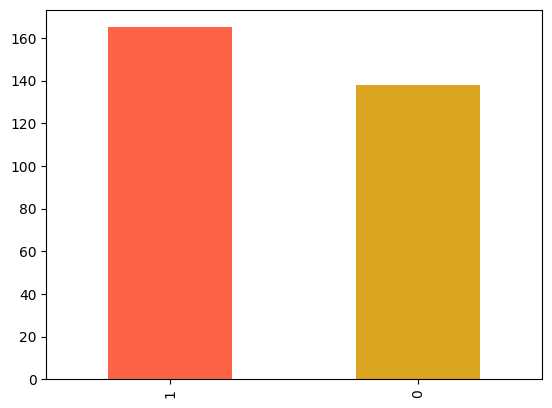

In [6]:
df['target'].value_counts().plot(kind='bar', color=['tomato','goldenrod']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heart disease frequency according to gender

In [10]:
df.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

There are 207 males and 96 females

In [11]:
pd.crosstab(df.target, df.gender)

gender,0,1
target,,
0,24,114
1,72,93


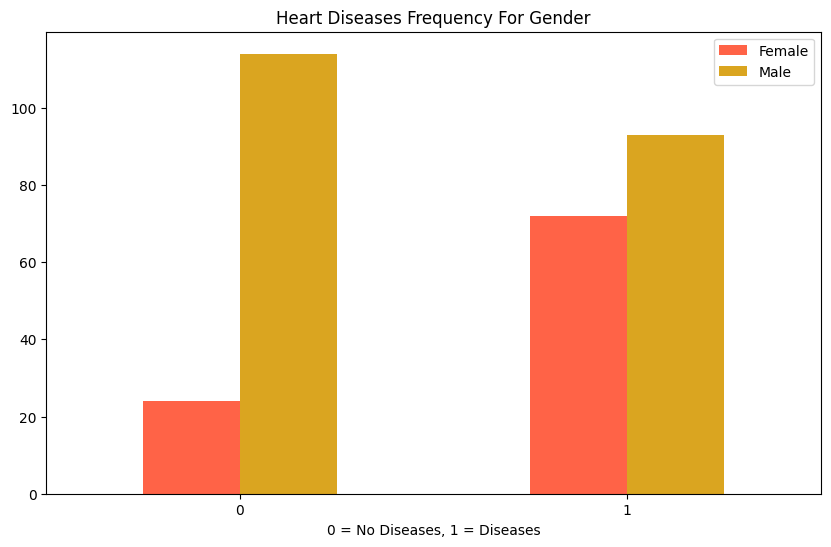

In [12]:
#creating a cross plot
pd.crosstab(df.target,df.gender).plot(kind='bar',color=['tomato','goldenrod'],figsize=(10,6))

plt.title('Heart Diseases Frequency For Gender')
plt.xlabel('0 = No Diseases, 1 = Diseases')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [13]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Age Vs Max Heart Rate for Heart Disease

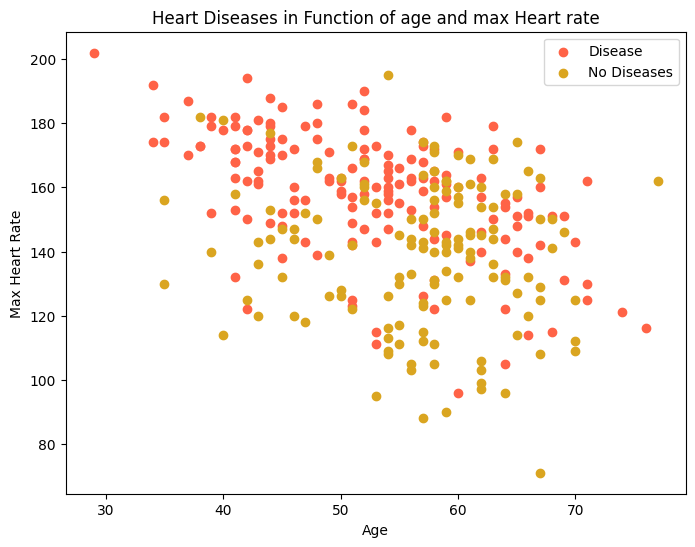

In [14]:
plt.figure(figsize=(8,6))

#scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='tomato')

#scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='goldenrod')

plt.title('Heart Diseases in Function of age and max Heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Diseases']);

<AxesSubplot: ylabel='Frequency'>

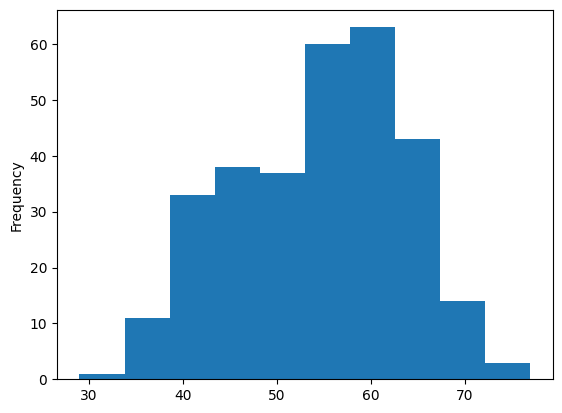

In [15]:
df.age.plot.hist()

Heart Diseases Frequency Per Chest Pain

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


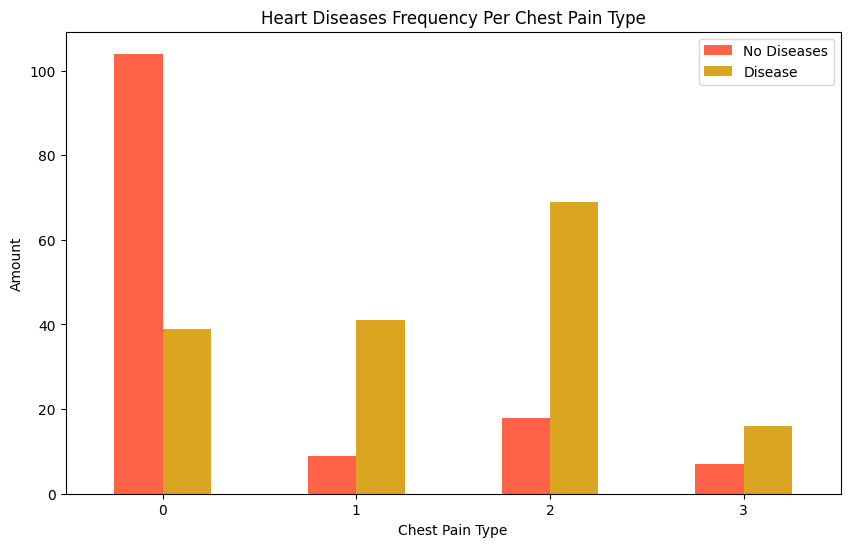

In [17]:
# Visualization
pd.crosstab(df.cp, df.target).plot(kind='bar'
                                   ,color=['tomato','goldenrod'],
                                   figsize=(10,6))

plt.title('Heart Diseases Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Diseases','Disease'])
plt.xticks(rotation=0);

cp-chest pain type: 
    <ul>
      <li> 0: Typical angina: chest pain related decrease blood supply to the heart    </li>
      <li> 1: Atypical angina: chest pain not related to heart  </li>
      <li> 2: Non-anginal pain: typically esophageal spasms(non heart related)  </li>
      <li> 3: Asymptomatic: chest pain not showing signs of diseases  </li>
    </ul>

In [18]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# finding the correlation between the independent variables
corr_mat = df.corr()
corr_mat

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


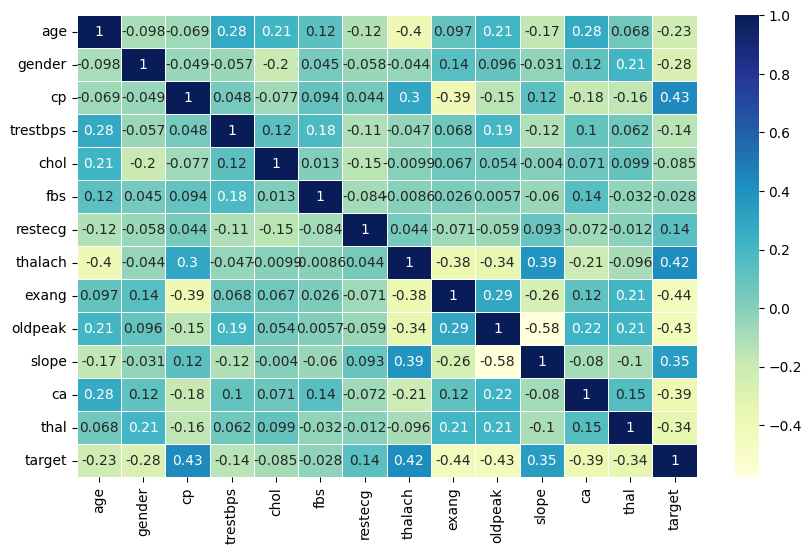

In [20]:
# making the correlation more visual
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_mat, linewidths=0.5, annot=True, cmap='YlGnBu')

Modeling

In [21]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# splitting the data into X and Y
X = df.drop('target', axis=1)
y = df['target']

In [23]:
# splitting data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# setting up a function to fit and score model
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models 
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # setting up a random seed
    np.random.seed(42)

    # making a dictionary to keep model scores
    model_scores = {}

    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(X_train, y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models, X_train=X_train,
                             X_test=X_test, y_train=y_train,
                             y_test=y_test)
model_scores

c:\Users\Daiyaan\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Compare Models

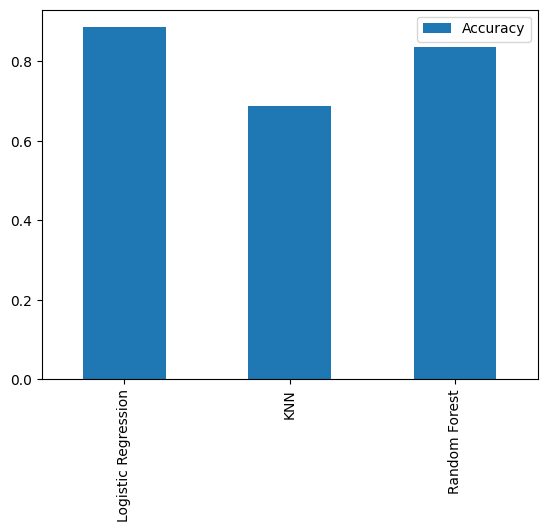

In [26]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
# T means transpose, so as to improve the plot
model_compare.T.plot.bar(); 

### Hyperparameter tuning

Random search is a method in which random combinations of hyperparameters are selected and used to train a model. The best random hyperparameter combinations are used.
GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. Both are very effective ways of tuning the parameters that increase the model generalizability.

### Hyperparameter tuning with RandomSearchCV
tuning:      
    - LogisticRegression      
    - RandomForestClassifier

In [27]:
# creating a hyperparameter grid for logistic regression 
log_reg_grid = {'C': np.logspace (-4, 4, 20),
                'solver': ['liblinear']}
                           
# creating a hyperparameter grid for randomforstclassifier 
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2), 
            'min_samples_leaf': np.arange(1, 20, 2)}

In [28]:
# Tuning logisticregression

np.random.seed(42)
# setup random hyperparameter search for Logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,n_iter=20,verbose=True)

# fitting random hyperparameter search model for logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.fit(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
# Tuning Randomforestclassifer

np.random.seed(42)
# setup random hyperparameter search for Randomforestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,n_iter=30,verbose=True)

# fitting random hyperparameter search model for logistic Regression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [33]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV
since logistic regression model performed better, we'll try to improve it again using GridSearchCV

In [34]:
# different hyperparameter for the logistic regression model 
log_reg_grid = {'C': np.logspace (-4, 4, 30),
                'solver': ['liblinear']}
np.random.seed(42)
# setup Grid hyperparameter search for Logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,verbose=True)

# fitting Grid hyperparameter search model for logisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Evaluating the tuned machine learning classifier,beyond accuracy

In [37]:
# making prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [38]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [39]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


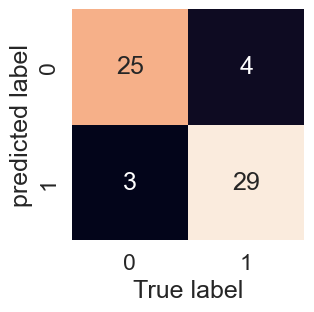

In [40]:
# ploting the confusion matrix to make it more visuals
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a good lookking confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True, cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')
plot_conf_mat(y_test, y_preds)

In [41]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### evaluating precision, recall and f1-score using cross_validation (cross_val_score)
Cross_val_score is a function in the scikit-learn package which trains and tests a model over multiple folds of your dataset. This cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split. Cross_val_score is used as a simple cross validation technique to prevent over-fitting and promote model generalisation.

In [42]:
# checking the best parameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# creating new classifier with best parameters
clf = LogisticRegression (C=0.20433597178569418,
                          solver="liblinear")

In [44]:
# cross_validated accuracy
cv_acc = cross_val_score (clf, X, y, scoring='accuracy')
cv_acc= np.mean(cv_acc)
cv_acc

0.8479781420765027

In [45]:
# cross_validated precision
cv_precision = cross_val_score (clf, X, y, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision    

0.8215873015873015

In [46]:
# cross_validated recall
cv_recall = cross_val_score (clf, X, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall    

0.9272727272727274

In [47]:
# cross_validated f1-score
cv_f1 = cross_val_score (clf, X, y, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1  

0.8705403543192143

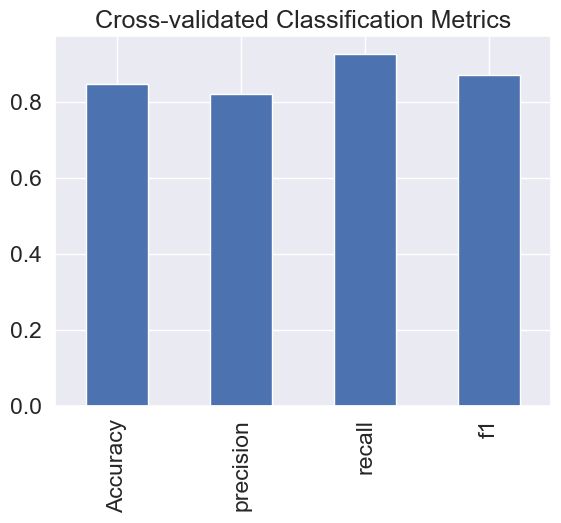

In [48]:
#visualizaion the cross_validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 'precision': cv_precision,
                           'recall': cv_recall, 'f1': cv_f1}, index=[0])
# T means transpose, so as to improve the plot
cv_metrics.T.plot.bar(title='Cross-validated Classification Metrics',
                      legend=False);

### Future Importance

In [49]:
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [50]:
clf.fit(X_train, y_train);

In [51]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [52]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'gender': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

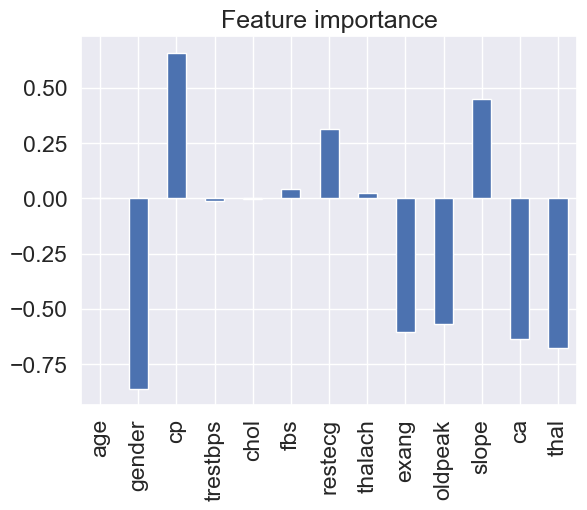

In [53]:
# visuallize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False);

some are negative and some are positive.  
The larger the value (bigger bar), the more the feature contributes to the models decision.      
If the value is negative, it means there's a negative correlation. And vice versa for positive values.     
For example, the gender attribute has a negative value of -0.904, which means as the value for gender increases, the target value decreases.            
this becomes more clear by comparing the gender column to the target column.

In [54]:
# negative coefficient (gender) with target
pd.crosstab(df["gender"], df["target"])

target,0,1
gender,,
0,24,72
1,114,93


we can see, when gender is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.           
And then as gender increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't, this                
mean...
 - The model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [55]:
#positive coefficient (slope) 
pd.crosstab (df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope is the "slope of the peak exercise ST segment" where: 
  <ul>
    <li>0: Upsloping: better heart rate with excercise (uncommon) </li>
    <li>1: Flatsloping: minimal change (typical healthy heart)</li>
    <li>2: Downslopins: signs of unhealthy heart</li>
  </ul>

According to the model, there's a positive correlation of 0.470, not as strong as gender and target but its more than 0.    
This positive correlation means the model is picking up the pattern that as slope increases, so does the target value. 